- Support vector machine (SVM) là một thụât toán học máy có giám sát được sử dụng rất phổ biến ngày nay trong các bài toán phân lớp (Classification) hay hồi qui (Regression)
- SVM được đề xuất bởi Vladimir N. Vapnik và các đồng nghiệp của ông vào năm 1963 tại Nga và sau đó trở nên phổ biến trong những năm 90 nhờ ứng dụng giải quyết các bài toán phi tuyến tính (nonlinear) bằng phương pháp Kernel Trick

# I. Support Vector Machine Là Gì?


- Như đã biết, với bài toán phân loại nhị phân tuyến tính ta cần vẽ được mặt phân tách (với không gian 2 chiều thì mặt phẳng này là đường phân tách): $$w^Tx + b = 0$$ để phân biệt được dữ liệu. Khi đó dấu của hàm ước lượng là $H = \begin{Bmatrix}
x \mapsto sgn(w^Tx +b) \, ; w \, \epsilon \,   \mathbb{R^{\mathbb{N}}}, b \, \epsilon \, \mathbb{R} 
\end{Bmatrix}$ sẽ thể hiện được điểm dữ liệu x nằm cụm nào của dữ liệu nào.

- Thông thường sẽ có rất nhiều đường phân tách thõa mãn được việc này. Chúng ta cần một đường phân chia sao cho khoảng cách từ điểm gần nhất của mỗi class tới đường phân chia là như nhau, như thế thì mới công bằng. Khoảng cách như nhau này được gọi là margin (lề).

- Trong SVM, chúng ta sẽ giải bài toán đi tìm đường phân chia sao cho có margin là lớn nhất. Đây cũng là lý do vì sao SVM còn được gọi là Maximum Margin Classifer.

<center><img src="https://i.imgur.com/i04kQwH.png" width="1000"></center>


## 1.1 Margin

- Margin là khoảng cách giữa siêu phẳng đến những điểm dữ liệu gần nhất tương ứng với 2 phân lớp.
- SVM cố gắng tối ưu thuật toán bằng cách maximize giá trị margin này, từ đó tìm ra siêu phẳng **đẹp nhất** đề phân loại 2 lớp dữ liệu.

## 1.2 Support Vectors


- Bài toán của chúng ta trở thành bài toán tìm ra 2 đường biên của 2 lớp dữ liệu sao cho khoảng cách giữa 2 đường này là lớn nhất.
- Ví dụ ta có 2 lớp dữ liệu được biểu diễn bằng màu xanh và đỏ:
-> Đường biên của lớp màu xanh sẽ đi qua một (hoặc 1 vài) điểm màu xanh.
-> Đường biên của lớp màu đỏ sẽ đi qua một (hoặc 1 vài) điểm màu đỏ.

- Các điểm xanh,đỏ nằm trên 2 đường biên được gọi là các support vector, vì chúng có nhiệm vụ support để tìm ra siêu phẳng.
> Đó cũng là lý do của tên gọi thuật toán **Support Vector Machine**

## 1.2 Cách tính Margin

- Như vậy, siêu phẳng cần tìm có dạng :

$$w^{T}x + b = 0$$

> Trong đó:
> - w là weight vector
> - x là input vector
> - b là bias



<center><img src="https://i.imgur.com/2mdRfd7.png" width="600"></center>

Với mỗi điểm dữ liệu:

$$y_i\left\{\begin{matrix}
+1 \text{    for + samples}
 & \\-1 \text{    for - samples} 
\end{matrix}\right.$$

$$y_i(\vec{w}.\vec{x_+} +b) \geqslant 1$$

$$y_i(\vec{w}.\vec{x_-} +b) \geqslant 1$$

Ta có thể  đơn giản hóa thành phương trình:

$$y_i(\vec{w}.\vec{x_i} +b) -1 = 0$$

<center><img src="https://i.imgur.com/SIvidL1.png" width="400"></center>

$$Margin = (\vec{x_+} - \vec{x_-}) . \frac{\vec{w}}{\parallel{w}\parallel} \tag{1}$$


Ta có: $$y_i(\vec{w}.\vec{x_i} + b) -1  =0 $$

Với $y_i=1$:
$$(1)(\vec{w}.\vec{x_+} + b) -1  =0 $$

$$\vec{w}.\vec{x_+} = 1- b  \tag{2}$$


Với $y_i=-1$:
$$(-1)(\vec{w}.\vec{x_-} + b) -1  =0 $$

$$\vec{w}.\vec{x_-} = - 1- b  \tag{3}$$

Từ (1), (2) và (3), ta có:
$$Margin = ((\vec{x_+} . \vec{w}) - (\vec{x_-} . \vec{w})) . \frac{1}{\left \| w \right \|}$$

$$Margin = ((1 - b) - (-1-b)) . \frac{1}{\left \| w \right \|}$$

$$Margin = \frac{2}{\left \| w \right \|}$$

Do đó, để chọn được 1 mặt phẳng tối ưu chúng ta phải tìm được margin có độ rộng lớn nhất:

$$max \frac{2}{\left \| w \right \|}$$

Tỉ lệ thuận với:

$$max \frac{1}{\left \| w \right \|}$$

Tương đương với:

$$min \left \| w \right \|$$

## 1.3 SVM - Optimization

$$\underset{w}{min}\frac{1}{2} {\left \| w \right \|}^2 $$

$$subject \, to: \frac{y_i(w^Tx_i+b)}{\left \| w \right \|^{2}} \geqslant \frac{1}{\left \| w \right \|^{2}} ,\ \text{for i=1 ... N}$$

Điều kiện trên tương đương: $y_i(w^Tx_i+b) \geqslant 1$
* Ở đây, N là số lượng các điểm dữ liệu $(x_i,y_i)$ còn việc lấy bình phương và chia đôi nhằm dễ dàng tính toán và tối ưu lồi.
* Đây là một bài quadratic optimization chịu các ràng buộc tuyến tính và có một điểm tối thiểu duy nhất.



## 1.4 Soft Margin

### Đặc vấn đề:
Xét 2 trường hợp như hình:


Ở hình thứ nhất, SVM vẫn có được nghiệm. Tuy nhiên, do có một điểm dữ liệu màu đỏ bị nhiễu, có khoảng cách rất gần với điểm dữ liệu màu xanh, dẫn đến margin có khoảng cách rất nhỏ. Nếu chấp nhận sai sót một lượng nhỏ điểm dữ liệu như vậy, margin sẽ được tăng lên và SVM sẽ hoạt động tốt hơn
<center><img src="https://imgur.com/e70Fgmk.png" width="400"></center

Ở hình thứ hai, SVM không có nghiệm, do dữ liệu không có tính linearly separable. Cách giải quyết ở đây vẫn là chấp nhận sai sót một số điểm dữ liệu để SVM có thể hoạt động tốt.
<center><img src="https://i.imgur.com/5XjcvQc.png" width="400"></center>

Để giải quyết những vấn đề như vậy, SVM sử dụng một khái niệm mới là soft margin, và tên gọi kỹ thuật này là soft margin SVM. Trong khi kỹ thuật SVM thuần còn gọi là hard margin SVM

Ta cần xây dựng một hàm vừa tối đa margin, vừa tối thiểu các điểm dữ liệu sai sót

Năm 1995, Vladimir Vapnik giới thiệu đến slack variable với các tính chất như sau:

<center><img src="https://i.imgur.com/jnvNXo6.png" width="400"></center>

Giới thiệu biến "slack":

*  $\xi \ge 0$
* Với $0 < \xi \leq 1$ thì điểm dữ liệu nằm giữa margin và nằm trong phía đúng của mặt phẳng. Đây là 1 **margin violation**
* Với $\xi \geq 1$ điểm dữ liệu gọi là **misclassified**

Gọi $x_{0}$ là điểm bị misclassified, khi đó thì khoảng cách từ $x_{0}$ đến "off the street" là: $$\frac{|w^T x_{0} +b|}{\parallel{w}\parallel} + \frac{1}{\parallel{w}\parallel} = \frac{1 + y_{x_{0}}(w^T x_{0} + b)}{\parallel{w}\parallel} = \frac{\xi_{x_{0}}}{\parallel{w}\parallel} \to \xi'$$ 

Gọi $x_{1}$ là điểm không bị misclassified, nhưng nằm giữa "off the street" và hyperlane, khi đó khoảng cách từ $x_{1}$ đến "off the street" là: $$\frac{1}{\parallel{w}\parallel} - \frac{|w^T x_{1} +b|}{\parallel{w}\parallel}  = \frac{1 - y_{x_{1}}(w^T x_{1} + b)}{\parallel{w}\parallel} = \frac{\xi_{x_{1}}}{\parallel{w}\parallel} \to \xi''$$


Hàm mục tiêu của soft margin SVM sẽ là:
$$\frac{1}{2}\parallel{w}\parallel{}^2 + C (\sum_{i}^{N}\xi_{i})$$

với điều kiện: $\frac{y_i(w^Tx_i+b)}{\parallel{w}\parallel{}} \geqslant \frac{1}{\parallel{w}\parallel{}} - \frac{\xi_{i}}{\parallel{w}\parallel} $. Nghĩa là: $y_i(w^Tx_i+b) \ge 1 -\xi_{i}$, với $i=1....N$


Trong đó, C là hằng số dương, có chức năng như gía trị điều chỉnh tầm quan trọng của margin và việc đánh đổi các điểm dữ liệu. Cụ thể, khi C nhỏ, giá trị của hàm mục tiêu không bị ảnh hưởng nhiều, việc tối ưu vẫn dành cho việc tối đa margin và ngược lại.

<center><img src="https://i.imgur.com/t1bwu0i.png" width="400"></center>

# Code Demo

Sử dụng thư viện Sklearn

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=50,n_features=2, centers=2,
                  random_state=0, cluster_std=0.6)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
y[1] = 0

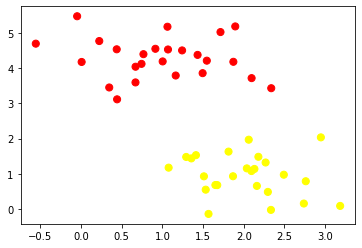

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=100) #C=10000000000
model.fit(X, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

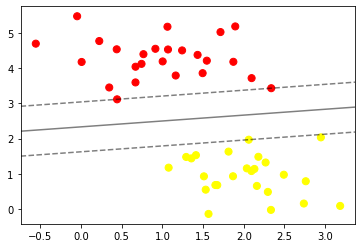

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

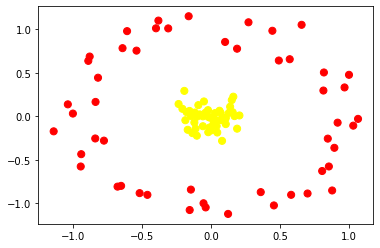

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

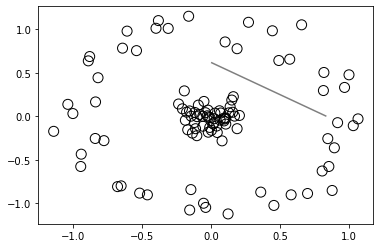

In [ ]:
model=SVC(kernel='linear').fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Text(0.5, 0, 'r')

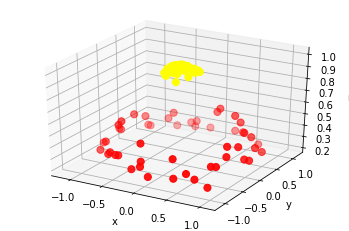

In [ ]:
from mpl_toolkits import mplot3d
#setting the 3rd dimension with RBF centered on the middle clump
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')